<h2 style='color:green' align='center' ><font size="5.5">Classification of Anomalies  in Gastrointestinal Tract through Endoscopic Imagery  Using Convolutional Neural Network (CNN)</font></h2>


<h2 style='color:gray' ><font size="3">Loading the image set and splits using 70% of the data for training and the remaining 30% for testing</font></h2>


In [112]:
import os
import splitfolders 

input_dir = os.path.join(r'C:\Users\Lahiru\Desktop\180186X  Model\kvasir-dataset-v2')
output_dir = os.path.join(r'C:\Users\Lahiru\Desktop\180186X  Model\kvasir-dataset-v2_splitted')

splitfolders.ratio(input_dir, output=output_dir, seed=1337, ratio=(.7, .3), group_prefix=None)

Copying files: 547 files [00:14, 14.86 files/s] 

Copying files: 8000 files [09:28, 14.06 files/s][A


In [44]:
train_dir = os.path.join(r'C:\Users\Lahiru\Desktop\180186X  Model\kvasir-dataset-v2_splitted\train')
test_dir = os.path.join(r'C:\Users\Lahiru\Desktop\180186X  Model\kvasir-dataset-v2_splitted\val')

<h2 style='color:gray' ><font size="3">ImageDataGenerator class which is used to perform image augmentation and flow_from_directory to read the images from a big numpy array and folders containing images.</font></h2>


In [74]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def image_generator(train_parent_directory, test_parent_directory):
    
    train_datagen = ImageDataGenerator(rescale=1/255)
    test_datagen = ImageDataGenerator(rescale=1/255)
    
    train_generator = train_datagen.flow_from_directory(train_parent_directory,
                                  target_size = (75,75),
                                  batch_size = 214,
                                  class_mode = 'categorical',
                                  subset='training')
 
    
    test_generator = test_datagen.flow_from_directory(test_parent_directory,
                                 target_size=(75,75),
                                 batch_size = 37,
                                 class_mode = 'categorical')    
    
    return train_generator, test_generator

train_generator, test_generator = image_generator(train_dir, test_dir)

In [76]:
classes=['dyed-lifted-polyps', 'dyed-resection-margins', 'esophagitis', 'normal-cecum', 'normal-pylorus', 'normal-z-line', 'polyps', 'ulcerative-colitis']

<h2 style='color:gray' ><font size="3">Preparing traing and testing data sets as X_train,y_train,X_test ,y_test</font></h2>

In [113]:
import numpy as np

In [114]:
X_train=[]
for j in range(len(train_generator)):    
    for m in train_generator[j][0]: 
        X_train.append(m)
        

In [115]:
y_train=[]
for i in range(len(train_generator)):
    for k in train_generator[i][1]:  
            y_train.append(np.argmax(k))           


In [117]:
X_test=[]        
for j in range(len(test_generator)):    
    for m in test_generator[j][0]: 
        X_test.append(m)

In [118]:
y_test=[]
for i in range(len(test_generator)):
    for k in test_generator[i][1]:  
            y_test.append(np.argmax(k))
           

<h2 style='color:gray' ><font size="3">Converting the feature lists into a NumPy array.</font></h2>

In [127]:
X_train=np.array(X_train)
y_train=np.array(y_train)

X_test=np.array(X_test)
y_test=np.array(y_test)

In [128]:
X_train.shape

(7592, 75, 75, 3)

In [129]:
y_train.shape

(7592,)

<h2 style='color:gray' ><font size="3">Ploting sample images using matplotlib.pyplot</font></h2>

In [120]:
import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

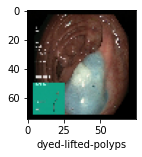

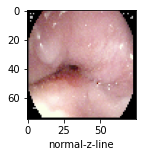

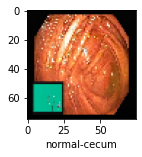

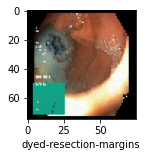

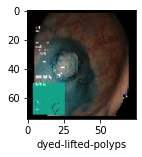

In [85]:
for i in range(5):    
    plot_sample(X_train, y_train, i)

<h2 style='color:gray' ><font size="3">Creating CNN usinga Sequential model by passing a list of layers to the Sequential constructor.</font></h2>

In [130]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [131]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(75, 75, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
     layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(8, activation='softmax')
])

<h2 style='color:gray' ><font size="3">Show model summary</font></h2>

In [156]:
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 73, 73, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 15, 15, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6272)             

<h2 style='color:gray' ><font size="3"> Complieing the CNN model using Optimizer and loss function before training.</font></h2>

In [132]:
cnn.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

<h2 style='color:gray' ><font size="3">Fitting the dataset to train</font></h2>

In [134]:
history=cnn.fit(X_train, y_train, epochs=16)

Epoch 1/16
238/238 [==============================] - 61s 240ms/step - loss: 0.8154 - accuracy: 0.6237
Epoch 2/16
238/238 [==============================] - 67s 280ms/step - loss: 0.6550 - accuracy: 0.7019
Epoch 3/16
238/238 [==============================] - 66s 278ms/step - loss: 0.5885 - accuracy: 0.7362
Epoch 4/16
238/238 [==============================] - 63s 265ms/step - loss: 0.5516 - accuracy: 0.7507
Epoch 5/16
238/238 [==============================] - 65s 274ms/step - loss: 0.5288 - accuracy: 0.7651
Epoch 6/16
238/238 [==============================] - 65s 274ms/step - loss: 0.4822 - accuracy: 0.7856
Epoch 7/16
238/238 [==============================] - 64s 270ms/step - loss: 0.4474 - accuracy: 0.8065
Epoch 8/16
238/238 [==============================] - 64s 271ms/step - loss: 0.4078 - accuracy: 0.8265
Epoch 9/16
238/238 [==============================] - 71s 299ms/step - loss: 0.3773 - accuracy: 0.8383
Epoch 10/16
238/238 [==============================] - 71s 299ms/step - l

<h2 style='color:gray' ><font size="3">Finding  model accuracy </font></h2>

In [136]:
accuracy=cnn.evaluate(X_test,y_test)[1]
print("\nModel Accuracy =", (accuracy * 100.0),"%") 

131/131 [==============================] - 14s 69ms/step - loss: 0.1837 - accuracy: 0.9382

Model Accuracy = 93.82156729698181 %


<h2 style='color:gray' ><font size="3">Visualizeing loss history </font></h2>

In [137]:
(history.history).keys()

dict_keys(['loss', 'accuracy'])

Copying files: 490 files [1:13:57,  9.06s/ files]
Copying files: 453 files [1:14:30,  9.87s/ files]


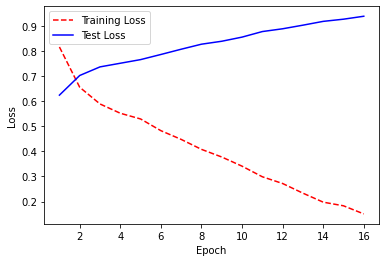

In [138]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

<h2 style='color:gray' ><font size="3">Checking model prediction</font></h2>

In [139]:
y_pred = cnn.predict(X_test)

In [140]:
y_classes = [np.argmax(element) for element in y_pred]

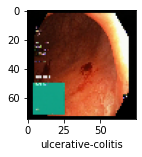

In [141]:
#Correct Anomalies 
plot_sample(X_test, y_test,336)

In [142]:
#Predict Anomalies by model
classes[y_classes[336]]

'ulcerative-colitis'

<h2 style='color:gray' ><font size="3">Computing confusion matrix to evaluate the accuracy of a classification.</font></h2>

In [143]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_classes)
cm

array([[487,  35,   1,   0,   0,   0,   1,   0],
       [ 13, 510,   0,   0,   0,   0,   1,   0],
       [  0,   0, 481,   0,   0,  43,   0,   0],
       [  0,   0,   0, 511,   0,   0,  10,   3],
       [  0,   0,   3,   0, 516,   1,   4,   0],
       [  0,   0,  99,   0,   1, 423,   1,   0],
       [  0,   0,   0,   6,   0,   0, 506,  12],
       [  0,   0,   0,   4,   0,   0,  21, 499]], dtype=int64)

<h2 style='color:gray' ><font size="3">Visualizing model accuracy using seaborn heatmap</font></h2>

([<matplotlib.axis.YTick at 0x2ca91911b08>,
 [Text(0, 0, 'dyed-lifted-polyps'),
  Text(0, 1, 'dyed-resection-margins'),
  Text(0, 2, 'esophagitis'),
  Text(0, 3, 'normal-cecum'),
  Text(0, 4, 'normal-pylorus'),
  Text(0, 5, 'normal-z-line'),
  Text(0, 6, 'polyps'),
  Text(0, 7, 'ulcerative-colitis')])

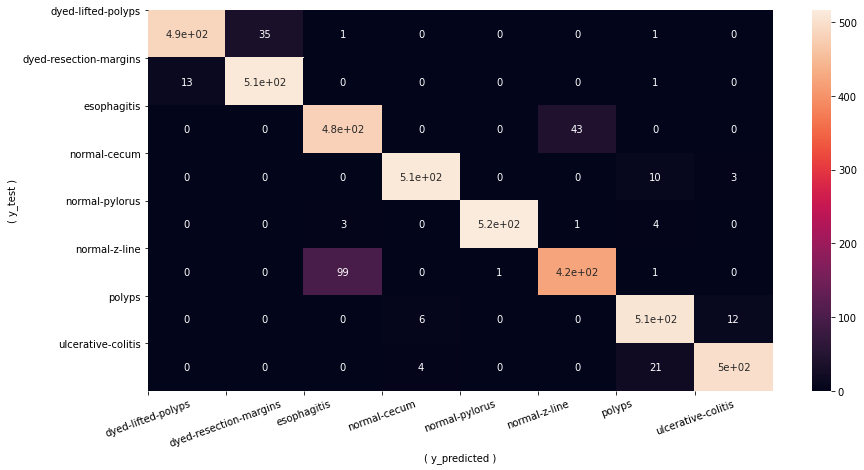

In [153]:
import seaborn as sn

plt.figure(figsize=(14,7))
sn.heatmap(cm,annot=True)

plt.ylabel('( y_test )')
plt.xlabel('( y_predicted )')
plt.xticks(range(len(classes)),classes, rotation=20)
plt.yticks(range(len(classes)),classes,rotation=0)
